In [95]:
# DC Properties
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
location = 'datasets/DC_Properties.csv'
df = pd.read_csv(location)

In [3]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [4]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [35]:
drop_df = df.drop(['Unnamed: 0', 'FULLADDRESS', 'CITY', 'STATE', 'LATITUDE', 'LONGITUDE', 'X', 'Y'], axis=1)

In [36]:
drop_df.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'ZIPCODE', 'NATIONALGRID', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'QUADRANT'],
      dtype='object')

In [37]:
drop_df = drop_df.drop(['AYB', 'YR_RMDL', 'EYB', 'STYLE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'SOURCE', 'FIREPLACES', 'EXTWALL', 'INTWALL', 'ROOF', 'SALE_NUM'], axis=1)
drop_df.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED', 'GBA', 'BLDG_NUM',
       'STRUCT', 'GRADE', 'CNDTN', 'KITCHENS', 'USECODE', 'LANDAREA',
       'GIS_LAST_MOD_DTTM', 'CMPLX_NUM', 'LIVING_GBA', 'ZIPCODE',
       'NATIONALGRID', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE',
       'QUADRANT'],
      dtype='object')

In [38]:
#combine bathroom columns
drop_df['BATHROOMS'] = drop_df['BATHRM'] + (drop_df['HF_BATHRM'] / 2)
drop_df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,...,CMPLX_NUM,LIVING_GBA,ZIPCODE,NATIONALGRID,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,BATHROOMS
0,4,0,Warm Cool,Y,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,...,NaN,NaN,20009.0,18S UJ 23061 09289,4201.0,004201 2006,Ward 2,152,NW,4.0
1,3,1,Warm Cool,Y,2.0,11,5,3.0,2000-08-17 00:00:00,NaN,...,NaN,NaN,20009.0,18S UJ 23067 09289,4201.0,004201 2006,Ward 2,152,NW,3.5
2,3,1,Hot Water Rad,Y,2.0,9,5,3.0,2016-06-21 00:00:00,2100000.0,...,NaN,NaN,20009.0,18S UJ 23074 09289,4201.0,004201 2006,Ward 2,152,NW,3.5
3,3,1,Hot Water Rad,Y,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,...,NaN,NaN,20009.0,18S UJ 23078 09288,4201.0,004201 2006,Ward 2,152,NW,3.5
4,2,1,Warm Cool,Y,1.0,11,3,3.0,NaN,NaN,...,NaN,NaN,20009.0,18S UJ 23188 09253,4201.0,004201 2006,Ward 2,152,NW,2.5


In [39]:
drop_df.drop(['BATHRM', 'HF_BATHRM'], axis=1, inplace=True)

In [40]:
drop_df.head()

,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,QUALIFIED,GBA,...,CMPLX_NUM,LIVING_GBA,ZIPCODE,NATIONALGRID,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,BATHROOMS
0,Warm Cool,Y,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,Q,2522.0,...,NaN,NaN,20009.0,18S UJ 23061 09289,4201.0,004201 2006,Ward 2,152,NW,4.0
1,Warm Cool,Y,2.0,11,5,3.0,2000-08-17 00:00:00,NaN,U,2567.0,...,NaN,NaN,20009.0,18S UJ 23067 09289,4201.0,004201 2006,Ward 2,152,NW,3.5
2,Hot Water Rad,Y,2.0,9,5,3.0,2016-06-21 00:00:00,2100000.0,Q,2522.0,...,NaN,NaN,20009.0,18S UJ 23074 09289,4201.0,004201 2006,Ward 2,152,NW,3.5
3,Hot Water Rad,Y,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,Q,2484.0,...,NaN,NaN,20009.0,18S UJ 23078 09288,4201.0,004201 2006,Ward 2,152,NW,3.5
4,Warm Cool,Y,1.0,11,3,3.0,NaN,NaN,U,5255.0,...,NaN,NaN,20009.0,18S UJ 23188 09253,4201.0,004201 2006,Ward 2,152,NW,2.5


In [41]:
dc_df = drop_df
dc_df.loc[dc_df['AC'] == 'Y', 'AC'] = 1
dc_df.loc[dc_df['AC'] == 'N', 'AC'] = 0

In [42]:
dc_df.head(20)

,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,QUALIFIED,GBA,...,CMPLX_NUM,LIVING_GBA,ZIPCODE,NATIONALGRID,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,BATHROOMS
0,Warm Cool,1,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,Q,2522.0,...,NaN,NaN,20009.0,18S UJ 23061 09289,4201.0,004201 2006,Ward 2,152,NW,4.0
1,Warm Cool,1,2.0,11,5,3.0,2000-08-17 00:00:00,NaN,U,2567.0,...,NaN,NaN,20009.0,18S UJ 23067 09289,4201.0,004201 2006,Ward 2,152,NW,3.5
2,Hot Water Rad,1,2.0,9,5,3.0,2016-06-21 00:00:00,2100000.0,Q,2522.0,...,NaN,NaN,20009.0,18S UJ 23074 09289,4201.0,004201 2006,Ward 2,152,NW,3.5
3,Hot Water Rad,1,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,Q,2484.0,...,NaN,NaN,20009.0,18S UJ 23078 09288,4201.0,004201 2006,Ward 2,152,NW,3.5
4,Warm Cool,1,1.0,11,3,3.0,NaN,NaN,U,5255.0,...,NaN,NaN,20009.0,18S UJ 23188 09253,4201.0,004201 2006,Ward 2,152,NW,2.5
5,Hot Water Rad,1,1.0,10,5,4.0,2010-02-26 00:00:00,1950000.0,Q,5344.0,...,NaN,NaN,20009.0,18S UJ 23157 09248,4201.0,004201 2006,Ward 2,152,NW,4.0
6,Warm Cool,1,2.0,5,2,2.0,2011-05-02 00:00:00,NaN,U,1260.0,...,NaN,NaN,20009.0,18S UJ 23042 09323,4201.0,004201 2005,Ward 2,152,NW,1.0
7,Hot Water Rad,1,2.0,8,4,3.0,2011-09-29 00:00:00,1050000.0,Q,2401.0,...,NaN,NaN,20009.0,18S UJ 23124 09368,4201.0,004201 2005,Ward 2,152,NW,3.5
8,Warm Cool,1,2.0,7,3,2.0,2018-05-03 00:00:00,1430000.0,Q,1488.0,...,NaN,NaN,20009.0,18S UJ 23142 09324,4201.0,004201 2005,Ward 2,152,NW,3.5
9,Hot Water Rad,1,1.0,6,2,2.0,2008-12-05 00:00:00,NaN,U,1590.0,...,NaN,NaN,20009.0,18S UJ 23127 09324,4201.0,004201 2005,Ward 2,152,NW,1.5


In [43]:
dc_df.isnull().sum()

HEAT                      0
AC                        0
NUM_UNITS             52261
ROOMS                     0
BEDRM                     0
STORIES               52305
SALEDATE              26770
PRICE                 60741
QUALIFIED                 0
GBA                   52261
BLDG_NUM                  0
STRUCT                52261
GRADE                 52261
CNDTN                 52261
KITCHENS              52262
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
CMPLX_NUM            106696
LIVING_GBA           106696
ZIPCODE                   1
NATIONALGRID          52906
CENSUS_TRACT              1
CENSUS_BLOCK          52906
WARD                      1
SQUARE                    0
QUADRANT                237
BATHROOMS                 0
dtype: int64

In [50]:
dc_df.drop(['CMPLX_NUM', 'LIVING_GBA'], axis=1, inplace=True)

In [51]:
clean_dc_df = dc_df.dropna()

In [55]:
clean_dc_df.head(50)

,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,QUALIFIED,GBA,...,LANDAREA,GIS_LAST_MOD_DTTM,ZIPCODE,NATIONALGRID,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,BATHROOMS
0,Warm Cool,1,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,Q,2522.0,...,1680,2018-07-22 18:01:43,20009.0,18S UJ 23061 09289,4201.0,004201 2006,Ward 2,152,NW,4.0
2,Hot Water Rad,1,2.0,9,5,3.0,2016-06-21 00:00:00,2100000.0,Q,2522.0,...,1680,2018-07-22 18:01:43,20009.0,18S UJ 23074 09289,4201.0,004201 2006,Ward 2,152,NW,3.5
3,Hot Water Rad,1,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,Q,2484.0,...,1680,2018-07-22 18:01:43,20009.0,18S UJ 23078 09288,4201.0,004201 2006,Ward 2,152,NW,3.5
5,Hot Water Rad,1,1.0,10,5,4.0,2010-02-26 00:00:00,1950000.0,Q,5344.0,...,2196,2018-07-22 18:01:43,20009.0,18S UJ 23157 09248,4201.0,004201 2006,Ward 2,152,NW,4.0
7,Hot Water Rad,1,2.0,8,4,3.0,2011-09-29 00:00:00,1050000.0,Q,2401.0,...,1627,2018-07-22 18:01:43,20009.0,18S UJ 23124 09368,4201.0,004201 2005,Ward 2,152,NW,3.5
8,Warm Cool,1,2.0,7,3,2.0,2018-05-03 00:00:00,1430000.0,Q,1488.0,...,1424,2018-07-22 18:01:43,20009.0,18S UJ 23142 09324,4201.0,004201 2005,Ward 2,152,NW,3.5
14,Warm Cool,1,2.0,5,3,2.0,2011-09-30 00:00:00,1325000.0,Q,2692.0,...,1815,2018-07-22 18:01:43,20009.0,18S UJ 23158 09326,4201.0,004201 2005,Ward 2,152,NW,3.5
16,Warm Cool,1,1.0,8,3,2.0,2010-11-04 00:00:00,1240000.0,Q,1662.0,...,1424,2018-07-22 18:01:43,20009.0,18S UJ 23147 09324,4201.0,004201 2005,Ward 2,152,NW,3.5
19,Hot Water Rad,1,2.0,9,3,2.0,2001-07-23 00:00:00,592250.0,Q,1598.0,...,1424,2018-07-22 18:01:43,20009.0,18S UJ 23122 09325,4201.0,004201 2005,Ward 2,152,NW,3.5
20,Hot Water Rad,1,1.0,14,5,3.0,2016-01-12 00:00:00,33232.0,U,3465.0,...,2090,2018-07-22 18:01:43,20009.0,18S UJ 23665 08908,5201.0,005201 4003,Ward 2,208,NW,3.5


In [54]:
clean_dc_df.corr()

,NUM_UNITS,ROOMS,BEDRM,STORIES,PRICE,GBA,BLDG_NUM,KITCHENS,USECODE,LANDAREA,ZIPCODE,CENSUS_TRACT,BATHROOMS
NUM_UNITS,1.000000,0.536729,0.340562,0.009966,0.000674,0.285926,-0.001953,0.910879,0.804607,-0.055939,-0.089669,0.079142,0.310772
ROOMS,0.536729,1.000000,0.685751,0.025686,0.342445,0.680804,-0.017557,0.527785,0.391928,0.295415,-0.023310,-0.193960,0.628271
BEDRM,0.340562,0.685751,1.000000,0.026184,0.358509,0.645886,-0.023882,0.353117,0.301122,0.304096,-0.040061,-0.239294,0.629159
STORIES,0.009966,0.025686,0.026184,1.000000,0.042238,0.042082,-0.000708,0.011593,0.011376,-0.014280,-0.018945,-0.017391,0.034881
PRICE,0.000674,0.342445,0.358509,0.042238,1.000000,0.601842,0.055336,0.046700,0.035265,0.365150,-0.161213,-0.368839,0.537375
GBA,0.285926,0.680804,0.645886,0.042082,0.601842,1.000000,-0.009867,0.296682,0.220076,0.497374,-0.069300,-0.342940,0.720087
BLDG_NUM,-0.001953,-0.017557,-0.023882,-0.000708,0.055336,-0.009867,1.000000,-0.002550,0.005635,0.040911,-0.007481,-0.012373,-0.012139
KITCHENS,0.910879,0.527785,0.353117,0.011593,0.046700,0.296682,-0.002550,1.000000,0.736872,-0.038216,-0.097601,0.050451,0.333283
USECODE,0.804607,0.391928,0.301122,0.011376,0.035265,0.220076,0.005635,0.736872,1.000000,-0.065316,-0.117466,0.054585,0.271954
LANDAREA,-0.055939,0.295415,0.304096,-0.014280,0.365150,0.497374,0.040911,-0.038216,-0.065316,1.000000,0.207857,-0.217629,0.337121


In [56]:
clean_dc_df.drop(['BLDG_NUM', 'ZIPCODE','HEAT', 'GIS_LAST_MOD_DTTM'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [57]:
clean_dc_df.loc[clean_dc_df['QUALIFIED'] == 'Q', 'QUALIFIED'] = 1
clean_dc_df.loc[dc_df['QUALIFIED'] == 'U', 'QUALIFIED'] = 0
clean_dc_df.corr()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,NUM_UNITS,ROOMS,BEDRM,STORIES,PRICE,QUALIFIED,GBA,KITCHENS,USECODE,LANDAREA,CENSUS_TRACT,BATHROOMS
NUM_UNITS,1.000000,0.536729,0.340562,0.009966,0.000674,-0.083107,0.285926,0.910879,0.804607,-0.055939,0.079142,0.310772
ROOMS,0.536729,1.000000,0.685751,0.025686,0.342445,-0.014312,0.680804,0.527785,0.391928,0.295415,-0.193960,0.628271
BEDRM,0.340562,0.685751,1.000000,0.026184,0.358509,0.012187,0.645886,0.353117,0.301122,0.304096,-0.239294,0.629159
STORIES,0.009966,0.025686,0.026184,1.000000,0.042238,0.005721,0.042082,0.011593,0.011376,-0.014280,-0.017391,0.034881
PRICE,0.000674,0.342445,0.358509,0.042238,1.000000,0.155442,0.601842,0.046700,0.035265,0.365150,-0.368839,0.537375
QUALIFIED,-0.083107,-0.014312,0.012187,0.005721,0.155442,1.000000,0.011725,-0.066341,-0.058648,-0.007719,-0.080163,0.105348
GBA,0.285926,0.680804,0.645886,0.042082,0.601842,0.011725,1.000000,0.296682,0.220076,0.497374,-0.342940,0.720087
KITCHENS,0.910879,0.527785,0.353117,0.011593,0.046700,-0.066341,0.296682,1.000000,0.736872,-0.038216,0.050451,0.333283
USECODE,0.804607,0.391928,0.301122,0.011376,0.035265,-0.058648,0.220076,0.736872,1.000000,-0.065316,0.054585,0.271954
LANDAREA,-0.055939,0.295415,0.304096,-0.014280,0.365150,-0.007719,0.497374,-0.038216,-0.065316,1.000000,-0.217629,0.337121


In [58]:
clean_dc_df.drop('QUALIFIED', axis=1, inplace=True)

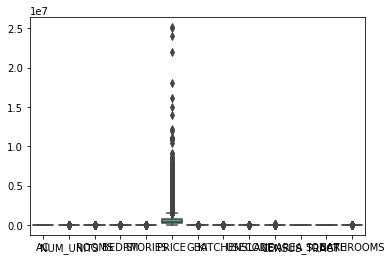

In [60]:
sns.boxplot(data=clean_dc_df)

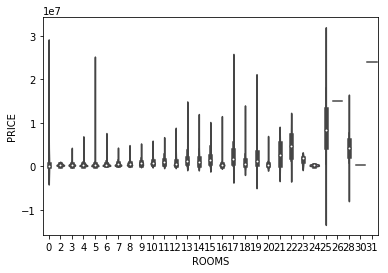

In [62]:
sns.violinplot(x='ROOMS', y='PRICE', data=clean_dc_df)

In [121]:
meanPrice = clean_dc_df['PRICE'].mean()
stdPrice = clean_dc_df['PRICE'].std()
toprange = meanPrice + stdPrice * 1.96
botrange = meanPrice - stdPrice *1.96

new_df = clean_dc_df.copy()
new_df = new_df.drop(new_df[new_df['PRICE'] > toprange].index)
new_df = new_df.drop(new_df[new_df['PRICE'] < botrange].index)

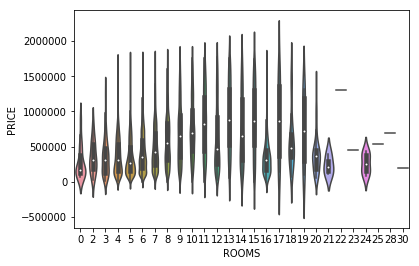

In [64]:
sns.violinplot(x='ROOMS', y='PRICE', data=new_df)

In [122]:
meanRooms = new_df['ROOMS'].mean()
stdRooms = new_df['ROOMS'].std()
toprange = meanRooms + stdRooms * 1.96
botrange = meanRooms - stdRooms *1.96

new_df = new_df.drop(new_df[new_df['ROOMS'] > toprange].index)
new_df = new_df.drop(new_df[new_df['ROOMS'] < botrange].index)

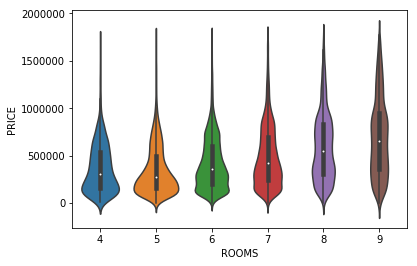

In [76]:
sns.violinplot(x='ROOMS', y='PRICE', data=new_df)

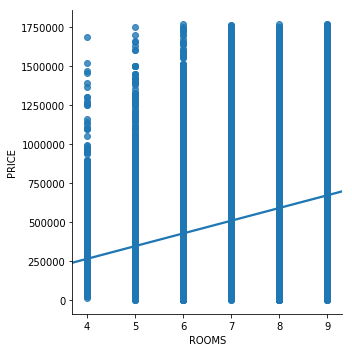

In [77]:
sns.lmplot(x='ROOMS', y='PRICE', data=new_df)

In [123]:
meanRooms = new_df['BEDRM'].mean()
stdRooms = new_df['BEDRM'].std()
toprange = meanRooms + stdRooms * 1.96
botrange = meanRooms - stdRooms *1.96

new_df = new_df.drop(new_df[new_df['BEDRM'] > toprange].index)
new_df = new_df.drop(new_df[new_df['BEDRM'] < botrange].index)

In [124]:
meanRooms = new_df['BATHROOMS'].mean()
stdRooms = new_df['BATHROOMS'].std()
toprange = meanRooms + stdRooms * 1.96
botrange = meanRooms - stdRooms *1.96

new_df = new_df.drop(new_df[new_df['BATHROOMS'] > toprange].index)
new_df = new_df.drop(new_df[new_df['BATHROOMS'] < botrange].index)

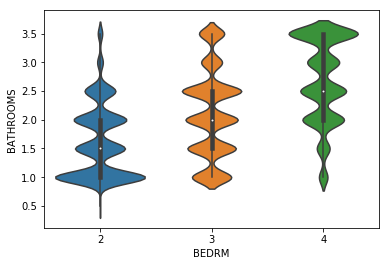

In [80]:
sns.violinplot(x='BEDRM', y='BATHROOMS', data=new_df)

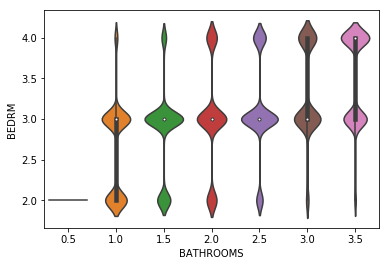

In [81]:
sns.violinplot(x='BATHROOMS', y='BEDRM', data=new_df)

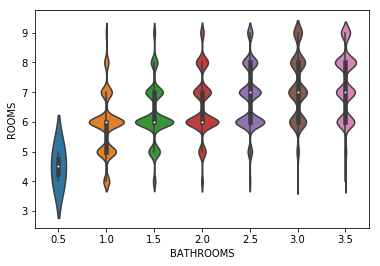

In [83]:
sns.violinplot(x='BATHROOMS', y='ROOMS', data=new_df)

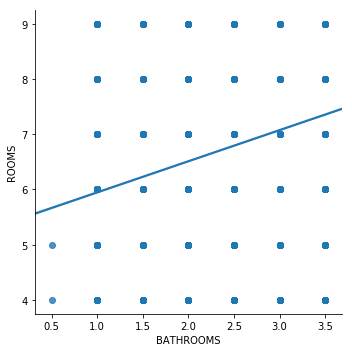

In [85]:
sns.lmplot(x='BATHROOMS', y='ROOMS', data=new_df)

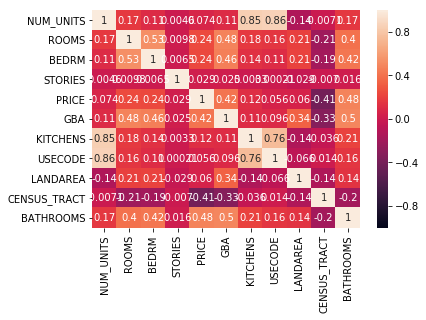

In [86]:
sns.heatmap(new_df.corr(), vmin=-1, annot=True)

In [88]:
meanRooms = new_df['KITCHENS'].mean()
stdRooms = new_df['KITCHENS'].std()
toprange = meanRooms + stdRooms * 1.96
botrange = meanRooms - stdRooms *1.96

new_df = new_df.drop(new_df[new_df['KITCHENS'] > toprange].index)
new_df = new_df.drop(new_df[new_df['KITCHENS'] < botrange].index)

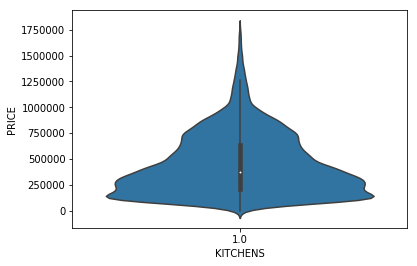

In [90]:
sns.violinplot(x='KITCHENS', y='PRICE', data=new_df)

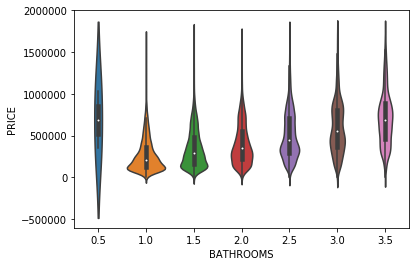

In [93]:
sns.violinplot(x='BATHROOMS', y='PRICE', data=new_df)

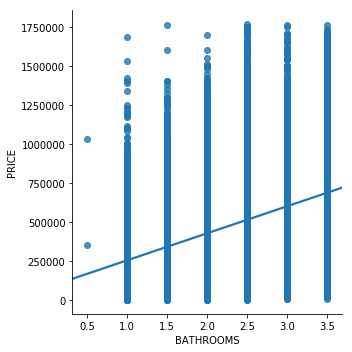

In [94]:
sns.lmplot(x='BATHROOMS', y='PRICE', data=new_df)

In [96]:
result = smf.ols('PRICE ~ ROOMS + BATHROOMS', data=new_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     5722.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:55:10   Log-Likelihood:            -5.4694e+05
No. Observations:               39386   AIC:                         1.094e+06
Df Residuals:                   39383   BIC:                         1.094e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5729.1210   7779.948     -0.736      0.461    -2.1e+04    9519.766
ROOMS       1.612e+04   1276.118     12.635      0.000    1.36e+04    1.86e+04
BATHROOMS   1.644e+05   1773.039     92.746      0.000    1.61e+05    1.68e+05
==============================================================================
Omnibus:                     4291.703   Durbin-Watson:                   1.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6087.762
Skew:                           0.851   Prob(JB):                         0.00
Kurtosis:                       3.901   Cond. No.                         42.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
result = smf.ols('PRICE ~ ROOMS + BATHROOMS - 1', data=new_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 6.276e+04
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:57:31   Log-Likelihood:            -5.4694e+05
No. Observations:               39386   AIC:                         1.094e+06
Df Residuals:                   39384   BIC:                         1.094e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ROOMS       1.529e+04    597.515     25.594      0.000    1.41e+04    1.65e+04
BATHROOMS   1.644e+05   1770.339     92.847      0.000    1.61e+05    1.68e+05
==============================================================================
Omnibus:                     4311.294   Durbin-Watson:                   1.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6123.886
Skew:                           0.853   Prob(JB):                         0.00
Kurtosis:                       3.904   Cond. No.                         9.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
new_df.set_index(pd.to_datetime(new_df['SALEDATE']), inplace=True)

In [131]:
new_df['SALEDATE'] = pd.to_datetime(new_df['SALEDATE'])

In [111]:
new_df.drop('SALEDATE', axis=1, inplace=True)
new_df.head()

,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,PRICE,GBA,STRUCT,GRADE,CNDTN,KITCHENS,USECODE,LANDAREA,NATIONALGRID,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,BATHROOMS
SALEDATE,,,,,,,,,,,,,,,,,,,,
2010-11-04,1,1.0,8,3,2.0,1240000.0,1662.0,Row Inside,Above Average,Very Good,1.0,11,1424,18S UJ 23147 09324,4201.0,004201 2005,Ward 2,152,NW,3.5
2006-01-09,1,1.0,6,3,2.0,907400.0,1790.0,Semi-Detached,Above Average,Good,1.0,13,2090,18S UJ 23651 08908,5201.0,005201 4003,Ward 2,208,NW,1.0
2012-08-21,1,1.0,5,3,2.0,1065000.0,1600.0,Semi-Detached,Above Average,Very Good,1.0,13,2090,18S UJ 23647 08908,5201.0,005201 4003,Ward 2,208,NW,2.5
2012-07-25,1,1.0,8,3,2.0,1100000.0,1958.0,Single,Above Average,Good,1.0,12,2090,18S UJ 23639 08902,5201.0,005201 4003,Ward 2,208,NW,2.5
1996-04-02,0,1.0,8,4,2.0,20000.0,2099.0,Row Inside,Above Average,Good,1.0,11,2090,18S UJ 23631 08905,5201.0,005201 4003,Ward 2,208,NW,1.0


In [142]:
year_cutoff = pd.to_datetime('1992-Jan-1')
cut_df = new_df.copy()


cut_df.drop(cut_df[(cut_df['SALEDATE'] <= year_cutoff)].index, inplace=True)

In [143]:
cut_df.drop('SALEDATE', axis=1, inplace=True)

Text(0, 0.5, 'Average Price')

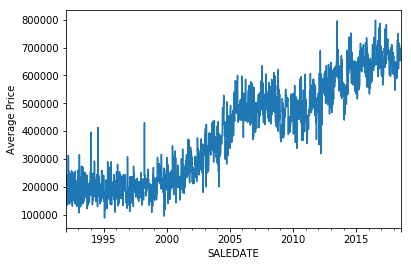

In [144]:
weekly = cut_df.resample('W').mean()
weekly['PRICE'].plot()
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

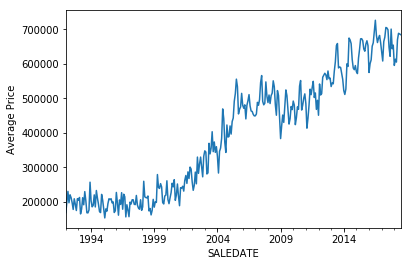

In [145]:
monthly = cut_df.resample('M').mean()
monthly['PRICE'].plot()
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

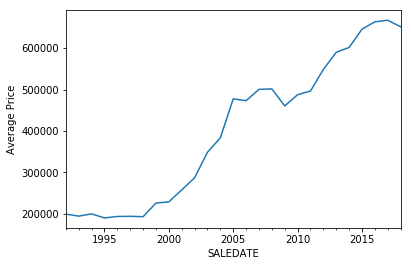

In [146]:
yearly = cut_df.resample('Y').mean()
yearly['PRICE'].plot()
plt.ylabel('Average Price')

In [140]:
cut_df.count()

AC              49639
NUM_UNITS       49639
ROOMS           49639
BEDRM           49639
STORIES         49639
PRICE           49639
GBA             49639
STRUCT          49639
GRADE           49639
CNDTN           49639
KITCHENS        49639
USECODE         49639
LANDAREA        49639
NATIONALGRID    49639
CENSUS_TRACT    49639
CENSUS_BLOCK    49639
WARD            49639
SQUARE          49639
QUADRANT        49639
BATHROOMS       49639
dtype: int64

In [141]:
cut_df.drop_duplicates()
cut_df.count()

AC              49639
NUM_UNITS       49639
ROOMS           49639
BEDRM           49639
STORIES         49639
PRICE           49639
GBA             49639
STRUCT          49639
GRADE           49639
CNDTN           49639
KITCHENS        49639
USECODE         49639
LANDAREA        49639
NATIONALGRID    49639
CENSUS_TRACT    49639
CENSUS_BLOCK    49639
WARD            49639
SQUARE          49639
QUADRANT        49639
BATHROOMS       49639
dtype: int64